# Importing Libraries

In [ ]:
import numpy as np

import tensorflow
from tensorflow.keras.applications import inception_v3
from tensorflow import keras
from tensorflow.keras.models import Model
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Capstone Project - RecyClear/datasets plastic type'

#Load Images For Training & Testing

In [ ]:
def create_data_generators(data_dir, batch_size):
    # ImageDataGenerator for training with preprocessing and augmentation
    train_datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1./255.,
        validation_split=0.1,
        # shear_range=0.1,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=30,
    )
    val_datagen = ImageDataGenerator(
        rescale=1. / 255,
        validation_split=0.1
    )

    # Training generator
    train_generator = train_datagen.flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
    )

    # Validation generator
    valid_generator = val_datagen.flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
    )

    return train_generator, valid_generator

batch_size = 32
train_generator, valid_generator = create_data_generators(data_dir, batch_size)

# # Display dataset information
# print("Jumlah kelas:", len(train_generator.class_indices))
# print("Jumlah sampel training:", len(train_generator.filenames))
# print("Jumlah sampel validation:", len(valid_generator.filenames))

NameError: ignored

# Model Building

##  Initialize Pretrained Model

In [ ]:
# Initializing InceptionV3 (pretrained) model with input image shape as (300, 300, 3)
base_model = keras.applications.inception_v3.InceptionV3(weights="imagenet", include_top=False, input_shape=(300, 300, 3))

# Setting the Training of all layers of InceptionV3 model to false
base_model.trainable = False

## Add Custom Layer

In [ ]:
from tensorflow.keras.regularizers import l2

# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    # Dense(512, activation='relu'),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(6, activation='softmax') # 6 Output Neurons for 6 Classes
])

##View Model Summary & Plot

In [ ]:
# Viewing the summary of the model
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_9  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_29 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_30 (Dense)            (None, 64)                65600     
                                                                 
 dense_31 (Dense)            (None, 3)                 195       
                                                      

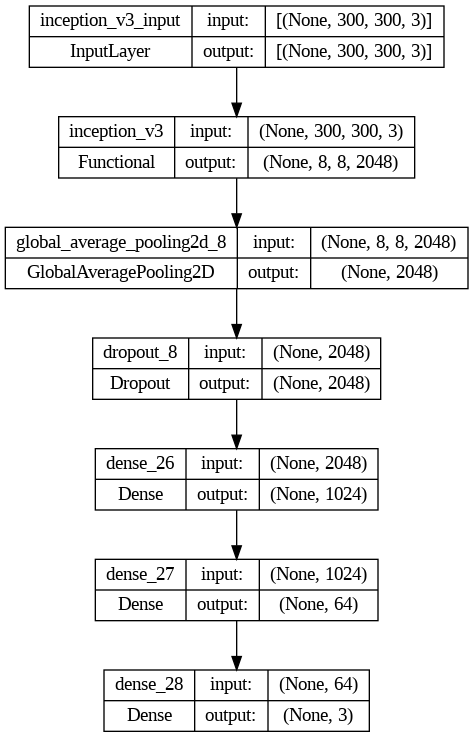

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Training Model

In [ ]:
#optimizer
opt = optimizers.Adam(learning_rate=0.00001)

# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(train_generator, epochs=20, validation_data=valid_generator)

Epoch 1/20
9/9 [==============================] - 24s 2s/step - loss: 2.9179 - accuracy: 0.3309 - val_loss: 2.2983 - val_accuracy: 0.6552
Epoch 2/20
9/9 [==============================] - 15s 2s/step - loss: 1.8926 - accuracy: 0.6727 - val_loss: 1.8414 - val_accuracy: 0.6552
Epoch 3/20
9/9 [==============================] - 16s 2s/step - loss: 1.5207 - accuracy: 0.7626 - val_loss: 1.7646 - val_accuracy: 0.6552
Epoch 4/20
9/9 [==============================] - 15s 2s/step - loss: 1.2619 - accuracy: 0.7806 - val_loss: 1.7366 - val_accuracy: 0.6897
Epoch 5/20
9/9 [==============================] - 16s 2s/step - loss: 0.9954 - accuracy: 0.8921 - val_loss: 1.5141 - val_accuracy: 0.6897
Epoch 6/20
9/9 [==============================] - 16s 2s/step - loss: 0.8600 - accuracy: 0.8885 - val_loss: 1.5001 - val_accuracy: 0.7586
Epoch 7/20
9/9 [==============================] - 16s 2s/step - loss: 0.7135 - accuracy: 0.9137 - val_loss: 1.3789 - val_accuracy: 0.8276
Epoch 8/20
9/9 [==================